#  Haberman’s Survival Data
Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Attribute Information:

Age of patient at the time of operation (numerical)

Patient’s year of operation (year — 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) :

1 = the patient survived 5 years or longer

2 = the patient died within 5 years

###Importing libraries and loading the file

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/haberman.csv")

In [43]:
 df.columns = ['Age', 'Year', 'Nodes', 'Survival']

In [44]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [45]:
df.shape

(305, 4)

In [46]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [47]:
df.duplicated().value_counts()

False    288
True      17
dtype: int64

Here are many duplicated rows but as per this dataset this situation can be true that some people have same symptoms and same situations. so we will not remove duplicated rows.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [49]:
df.Survival.value_counts()

1    224
2     81
Name: Survival, dtype: int64

In [50]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [51]:
df

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


we get basic idea that

MInimun age = 30

Maximum age = 83

Node Range =[0,52]

Survival=[0,1]

Nodes has higher density around(0-4)

## Univariate Analysis

### Survival

In [52]:
df.Survival.value_counts()

1    224
2     81
Name: Survival, dtype: int64

We can say there are approximately 30% people who will be living less than 5 years.

<Axes: xlabel='Survival', ylabel='count'>

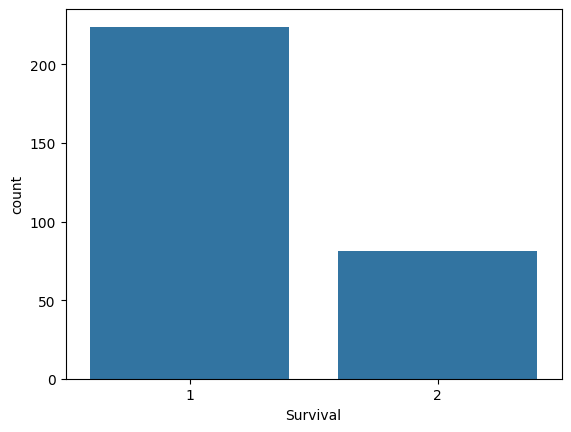

In [55]:
sns.countplot(x='Survival',data=df)

### Age

In [56]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

In [57]:
print(df.Age.skew())

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

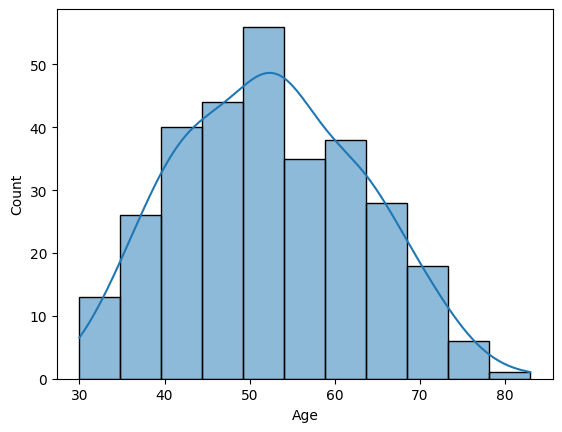

In [58]:
sns.histplot(x='Age',data=df,binwidth=5,kde=True)

People of Age between 50 - 55 have done the most number od operations.

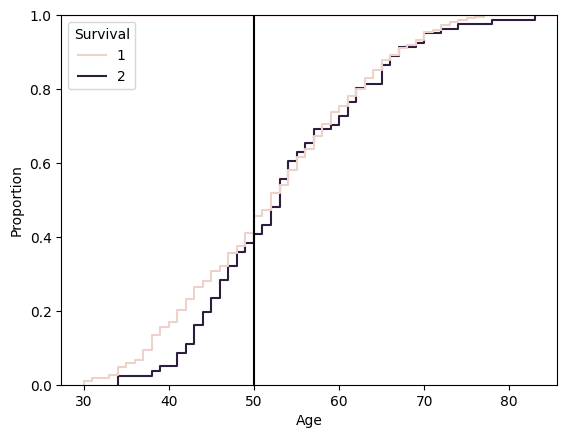

In [62]:
sns.ecdfplot(x='Age',data=df,hue='Survival')
plt.axvline(50,c='black')
plt.axhline(1,c='red')


### Operation year

In [63]:
df.Year.value_counts()

58    36
64    30
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year, dtype: int64

<Axes: >

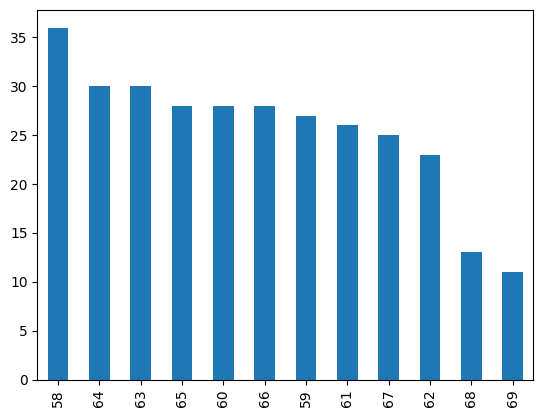

In [64]:
df.Year.value_counts().plot(kind='bar')

### Lymph Nodes

In [65]:
df.Nodes.describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

In [71]:
plt.Figure(figsize=(12, 6))
df.Nodes

0       3
1       0
2       2
3       4
4      10
       ..
300     1
301     0
302     3
303     1
304     2
Name: Nodes, Length: 305, dtype: int64

In [74]:
print(df.Nodes.skew())

2.9776817337612087


<Axes: xlabel='Nodes', ylabel='Count'>

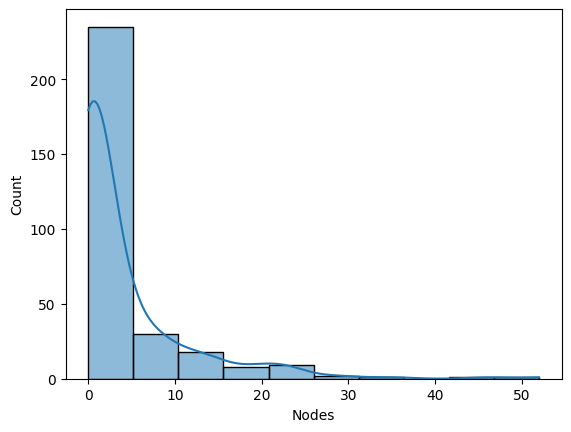

In [75]:
sns.histplot(x='Nodes',data=df,binwidth=5,kde=True)

Maximum density count for nodes in between ( 0 - 10)

## Bivariate Analysis

### Age - Survival

<Axes: xlabel='Survival', ylabel='Age'>

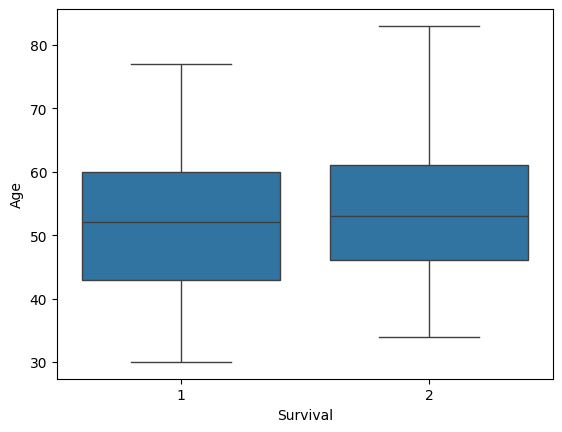

In [76]:
sns.boxplot(x='Survival', y='Age',data=df)

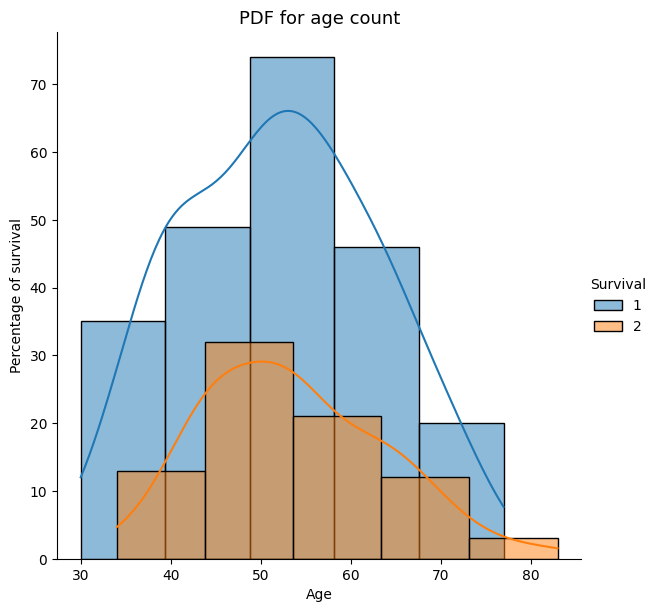

In [88]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.histplot,'Age',bins=5,kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel("Percentage of survival")
plt.title("PDF for age count",size=13)
plt.show()

In [89]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
52    18
54    17
53    17
43    15
50    14
65    14
57    14
47    14
41    13
61    12
49    12
45    12
55    12
42    11
46    11
38    11
44    10
48    10
62    10
63     9
34     9
59     9
56     9
70     9
51     8
60     8
67     8
58     7
39     7
66     7
37     6
72     5
69     5
64     5
74     3
40     3
73     2
78     2
30     2
68     2
31     2
36     2
35     2
33     2
83     2
71     1
75     1
76     1
77     1
Name: Survival, dtype: int64

In [91]:
df.Age.value_counts().sort_values(ascending=False)

52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: Age, dtype: int64

### Age -Nodes

<function matplotlib.pyplot.show(close=None, block=None)>

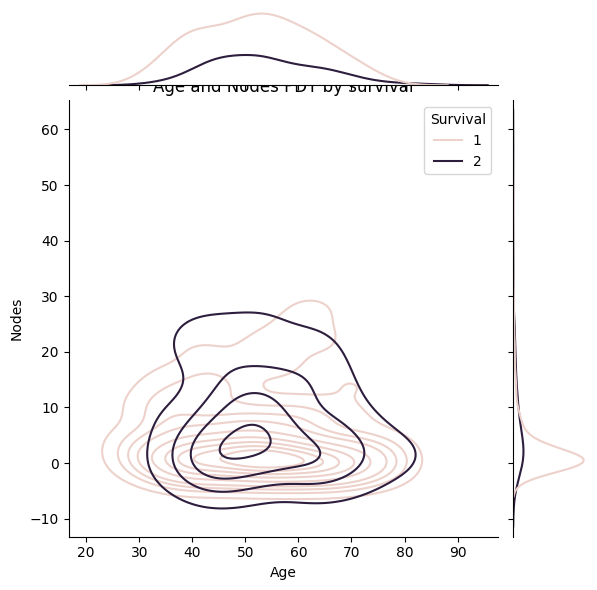

In [92]:
sns.jointplot(x='Age',y='Nodes',data=df,hue='Survival',kind='kde')
plt.title('Age and Nodes PDT by survival')
plt.show

<Axes: xlabel='Survival', ylabel='Nodes'>

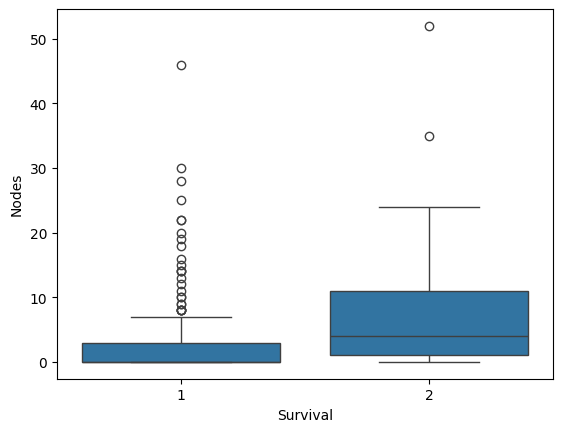

In [93]:
sns.boxplot(x='Survival', y='Nodes',data=df)

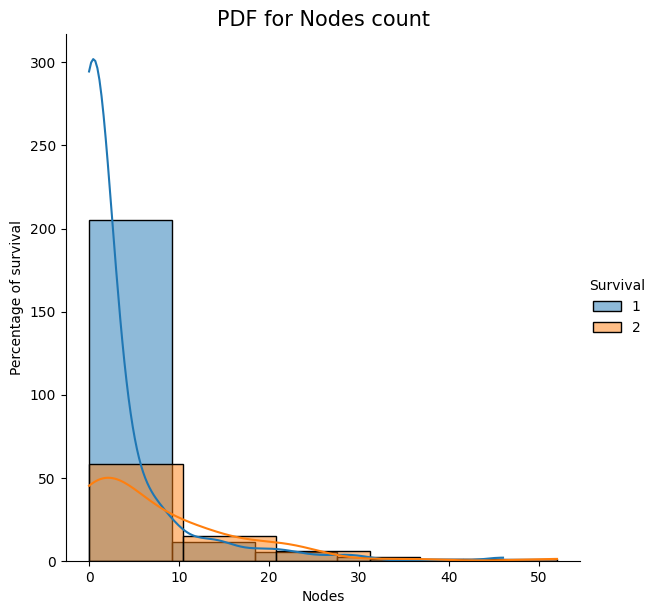

In [95]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.histplot,'Nodes',bins=5,kde=True).add_legend()
plt.xlabel('Nodes')
plt.ylabel("Percentage of survival")
plt.title("PDF for Nodes count",size=15)
plt.show()

### AGE - YEAR

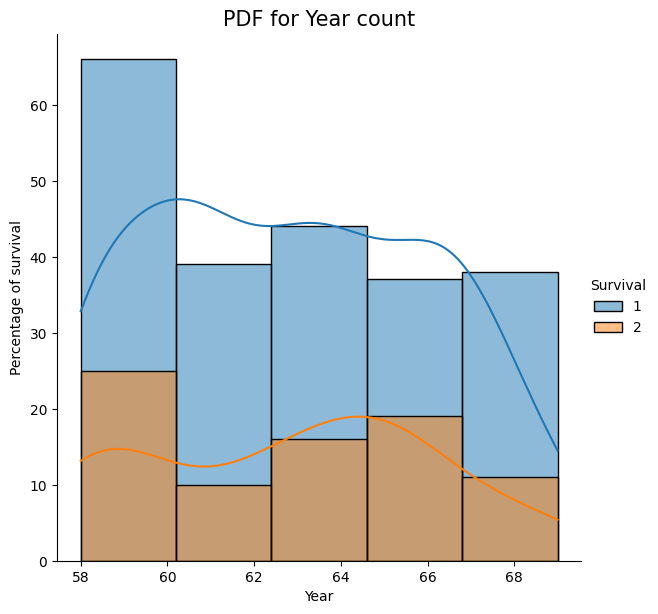

In [96]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.histplot,'Year',bins=5,kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel("Percentage of survival")
plt.title("PDF for Year count",size=15)
plt.show()

In [98]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
1,24,18,24,23,16,22,22,15,22,21,10,7
2,12,9,4,3,7,8,8,13,6,4,3,4


Between the year of 1960-65, 45 % people died before the 5 years after the operation.

### Multivariate Analysis

<Axes: >

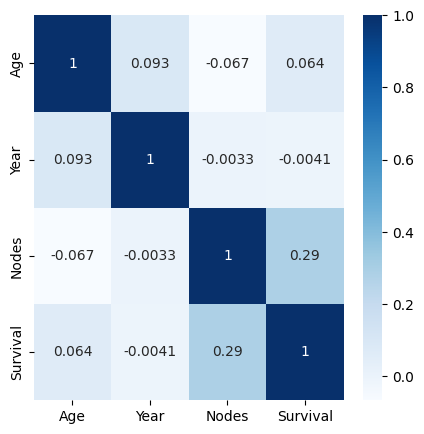

In [115]:
plt.figure(figsize=(5,5))
corr = df.corr()
sns.heatmap(corr,cmap='Blues',annot=True)

## Conclusion

#### Age
Age between 43 - 53 have lesser chance to live for 5 years after the operation.

age between 30 - 33 have more chances to live for 5 years.

People of age of 77 and more will likely not live 5 years after the operation.

#### Nodes
People having nodes (10-52) have lesser chance to survive for five years.

#### Year

33% people died between 1955 -65.
